In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 7.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=67513036a22d91002da5b45fe0d9da311a54a93cbb3bbc4ca9d8c6eba3e9a8da
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
waist =ctrl.Antecedent(np.arange(45,56,1),'waist')
height =ctrl.Antecedent(np.arange(90,131,1),'height')
chest =ctrl.Antecedent(np.arange(15,26,1),'chest')
size =ctrl.Consequent(np.arange(0,2.5,0.5),'size')


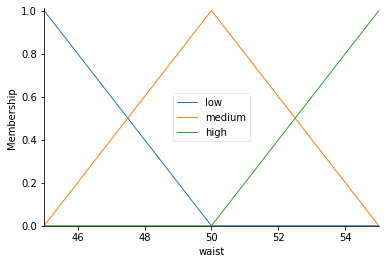

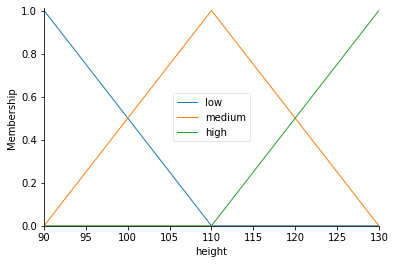

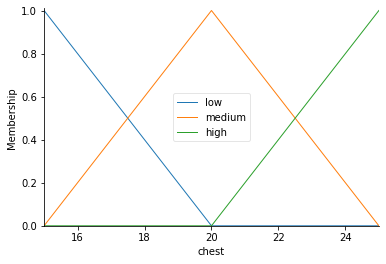

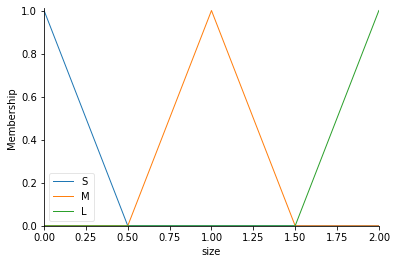

In [4]:
waist['low']=fuzz.trimf(waist.universe,[45,45,50])
waist['medium']=fuzz.trimf(waist.universe,[45,50,55])
waist['high']=fuzz.trimf(waist.universe,[50,55,55])

height['low']=fuzz.trimf(height.universe,[90,90,110])
height['medium']=fuzz.trimf(height.universe,[90,110,130])
height['high']=fuzz.trimf(height.universe,[110,130,130])

chest['low']=fuzz.trimf(chest.universe,[15,15,20])
chest['medium']=fuzz.trimf(chest.universe,[15,20,25])
chest['high']=fuzz.trimf(chest.universe,[20,25,25])

size['S']=fuzz.trimf(size.universe,[0,0,0.5])
size['M']=fuzz.trimf(size.universe,[0.5,1,1.5])
size['L']=fuzz.trimf(size.universe,[1.5,2,2])
waist.view()
height.view()
chest.view()
size.view()

In [5]:
rule1=ctrl.Rule(height['low'] | waist['low'], size['S'])
rule2=ctrl.Rule(waist['high'], size['L'])
rule3=ctrl.Rule(height['high'] & waist['high'] & chest['high'], size['L'])
rule4=ctrl.Rule(height['high'] & waist['medium'] & chest['low'], size['M'])
rule3=ctrl.Rule(height['high'] & waist['medium'] & chest['medium'], size['L'])
rule6=ctrl.Rule(height['high'] & waist['medium'] & chest['high'], size['L'])
rule7=ctrl.Rule(height['medium'] & waist['medium'] & chest['low'], size['M'])
rule8=ctrl.Rule(height['medium'] & waist['medium'] & chest['medium'], size['M'])
rule9=ctrl.Rule(height['medium'] & waist['medium'] & chest['high'], size['L'])

In [6]:
tipping_ctrl=ctrl.ControlSystem([rule1, rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)

0.16666666666666666


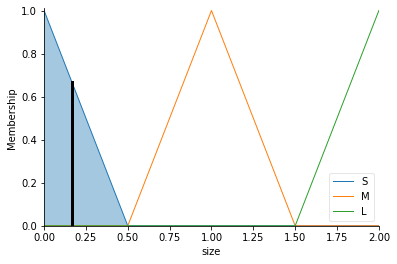

In [7]:
tipping.input['height'] =90
tipping.input['chest']=30
tipping.input['waist']=39
tipping.compute()
print(tipping.output['size'])
size.view(sim=tipping)